In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('countries of the world.csv', decimal=',')
df['Country'] = df.Country.str.strip()
df.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


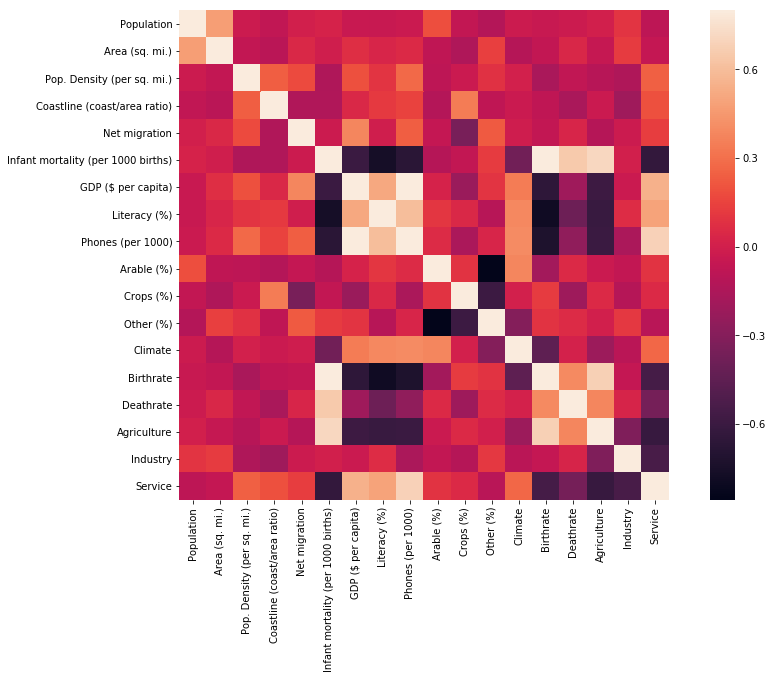

In [19]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

In [20]:
df['Climate Type'] = 'insufficient data'
df.loc[(df['Climate'] == 1.0), 'Climate Type'] = '1. Dry Tropical / Tundra Ice'
df.loc[(df['Climate'] == 1.5), 'Climate Type'] = 'Both 1 & 2'
df.loc[(df['Climate'] == 2.0), 'Climate Type'] = '2. Wet Tropical'
df.loc[(df['Climate'] == 2.5), 'Climate Type'] = 'Both 2 & 3'
df.loc[(df['Climate'] == 3.0), 'Climate Type'] = '3. Temp Humid Subtropical & Temp Continental'
df.loc[(df['Climate'] == 4.0), 'Climate Type'] = '4. Dry Hot Summers & Wet Winters'

In [21]:
df_sub = df[['Country', 'Region', 'Climate', 'Climate Type', 'Infant mortality (per 1000 births)', 
             'GDP ($ per capita)', 'Agriculture', 'Birthrate']]
df_sub.head(10)

,Country,Region,Climate,Climate Type,Infant mortality (per 1000 births),GDP ($ per capita),Agriculture,Birthrate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,1. Dry Tropical / Tundra Ice,163.07,700.0,0.380,46.60
1,Albania,EASTERN EUROPE,3.0,3. Temp Humid Subtropical & Temp Continental,21.52,4500.0,0.232,15.11
2,Algeria,NORTHERN AFRICA,1.0,1. Dry Tropical / Tundra Ice,31.00,6000.0,0.101,17.14
3,American Samoa,OCEANIA,2.0,2. Wet Tropical,9.27,8000.0,NaN,22.46
4,Andorra,WESTERN EUROPE,3.0,3. Temp Humid Subtropical & Temp Continental,4.05,19000.0,NaN,8.71
5,Angola,SUB-SAHARAN AFRICA,NaN,insufficient data,191.19,1900.0,0.096,45.11
6,Anguilla,LATIN AMER. & CARIB,2.0,2. Wet Tropical,21.03,8600.0,0.040,14.17
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0,2. Wet Tropical,19.46,11000.0,0.038,16.93
8,Argentina,LATIN AMER. & CARIB,3.0,3. Temp Humid Subtropical & Temp Continental,15.18,11200.0,0.095,16.73
9,Armenia,C.W. OF IND. STATES,4.0,4. Dry Hot Summers & Wet Winters,23.28,3500.0,0.239,12.07


In [22]:
sub_corr = df_sub.corr()
sub_corr

,Climate,Infant mortality (per 1000 births),GDP ($ per capita),Agriculture,Birthrate
Climate,1.000000,-0.374406,0.340791,-0.210642,-0.455097
Infant mortality (per 1000 births),-0.374406,1.000000,-0.600774,0.709475,0.845764
GDP ($ per capita),0.340791,-0.600774,1.000000,-0.586769,-0.650137
Agriculture,-0.210642,0.709475,-0.586769,1.000000,0.678207
Birthrate,-0.455097,0.845764,-0.650137,0.678207,1.000000


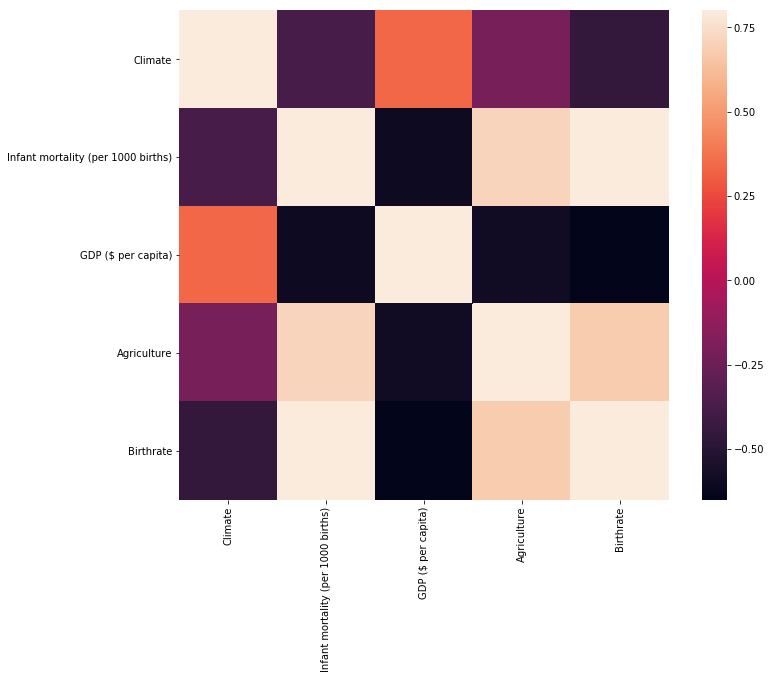

In [23]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(sub_corr, vmax=.8, square=True)
plt.show()

In [24]:
df_sub.describe()

,Climate,Infant mortality (per 1000 births),GDP ($ per capita),Agriculture,Birthrate
count,205.000000,224.000000,226.000000,212.000000,224.000000
mean,2.139024,35.506964,9689.823009,0.150844,22.114732
std,0.699397,35.389899,10049.138513,0.146798,11.176716
min,1.000000,2.290000,500.000000,0.000000,7.290000
25%,2.000000,8.150000,1900.000000,0.037750,12.672500
50%,2.000000,21.000000,5550.000000,0.099000,18.790000
75%,3.000000,55.705000,15700.000000,0.221000,29.820000
max,4.000000,191.190000,55100.000000,0.769000,50.730000


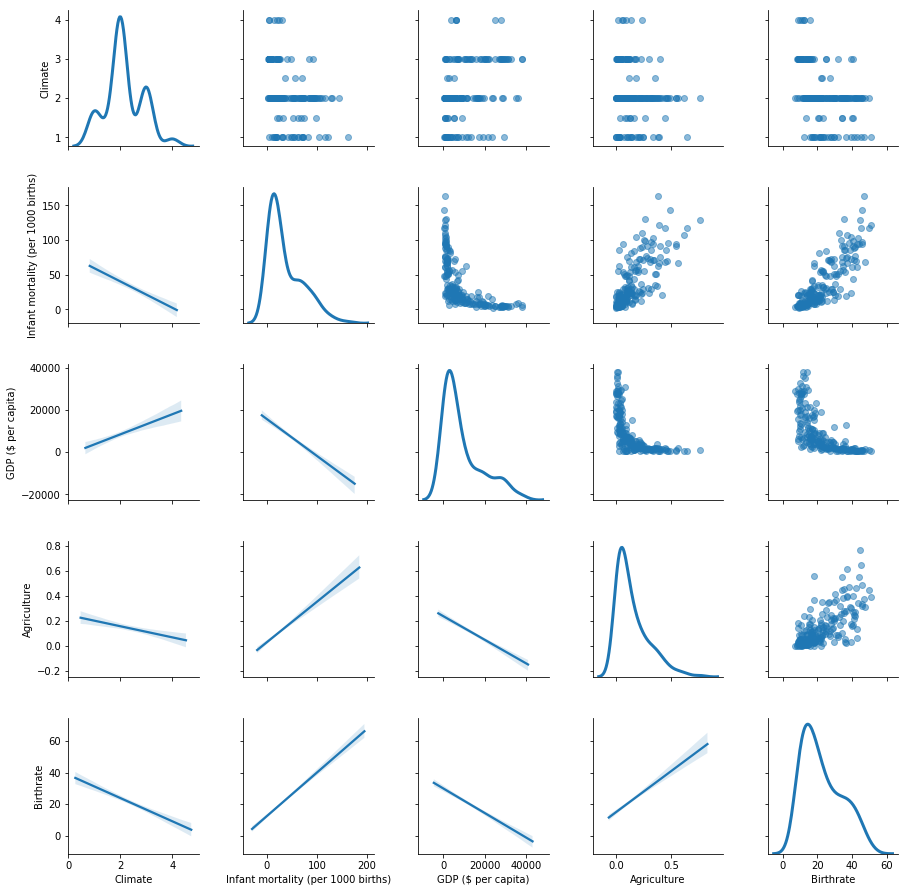

In [25]:
g = sns.PairGrid(df_sub.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

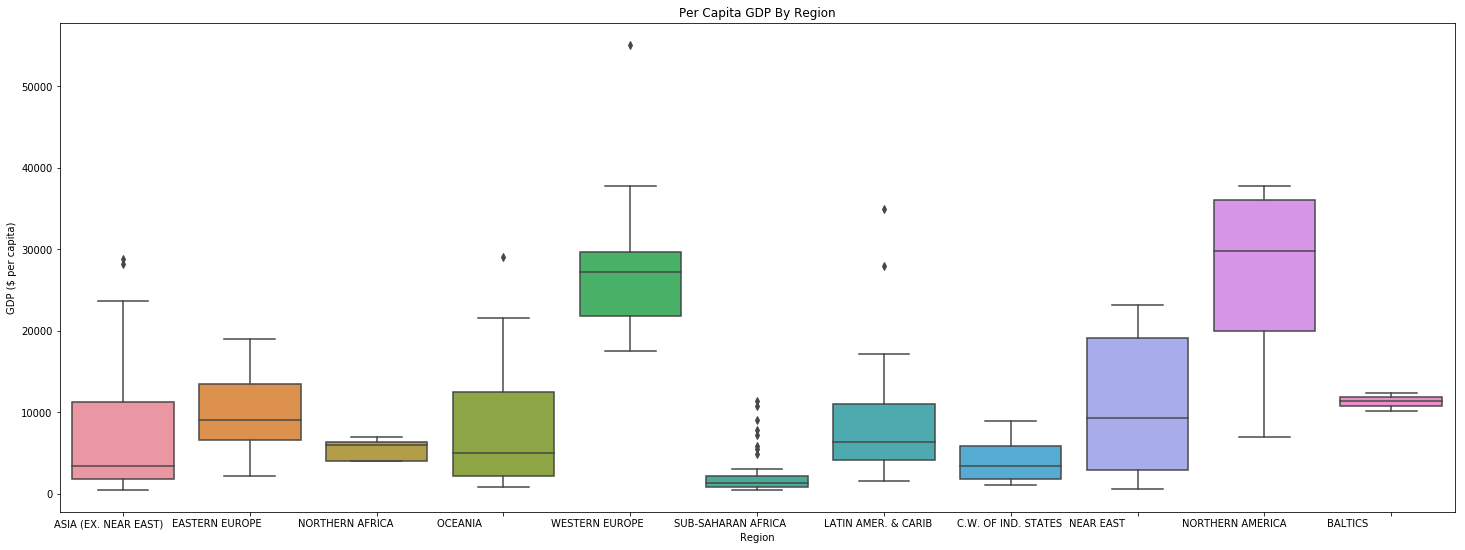

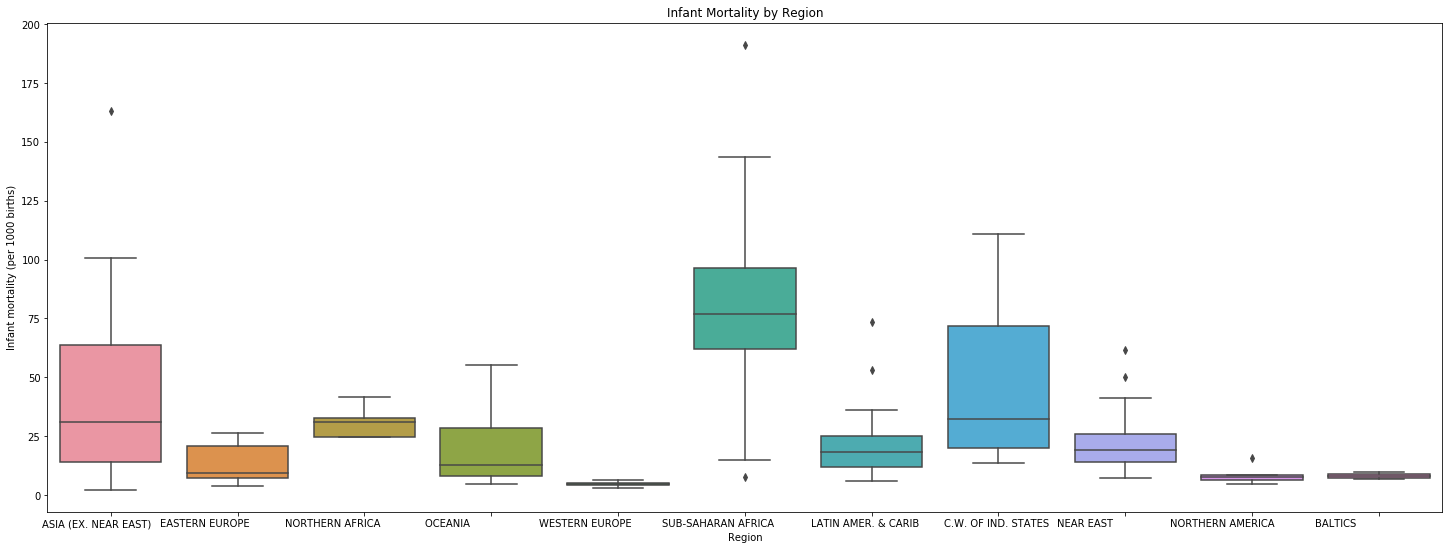

In [26]:
f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x='Region', y='GDP ($ per capita)', data=df_sub)
plt.title('Per Capita GDP By Region')
plt.show()

f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x='Region', y='Infant mortality (per 1000 births)', data=df_sub)
plt.title('Infant Mortality by Region')
plt.show()

In [27]:
countries_grouped = df.groupby('Region')[['Country','Population','Area (sq. mi.)']].agg({'Country':'count', 'Population':'sum','Area (sq. mi.)':'sum'})
print(countries_grouped)

                                     Country  Population  Area (sq. mi.)
Region                                                                  
ASIA (EX. NEAR EAST)                      28  3687982236        23096712
BALTICS                                    3     7184974          175015
C.W. OF IND. STATES                       12   280081548        22100843
EASTERN EUROPE                            12   119914717         1152222
LATIN AMER. & CARIB                       45   561824599        20544084
NEAR EAST                                 16   195068377         4355586
NORTHERN AFRICA                            6   161407133         6018890
NORTHERN AMERICA                           5   331672307        21782471
OCEANIA                                   21    33131662         8519812
SUB-SAHARAN AFRICA                        51   749437000        24341406
WESTERN EUROPE                            28   396339998         3710478


In [28]:
from sklearn import preprocessing
df_num = df_sub.select_dtypes(include=[np.number]).dropna()

names = df_num.columns

df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)
df_scaled.head(10)

,Climate,Infant mortality (per 1000 births),GDP ($ per capita),Agriculture,Birthrate
0,-1.632569,3.633665,-0.883976,1.529919,2.120931
1,1.199663,-0.458149,-0.486777,0.535412,-0.683308
2,-1.632569,-0.184109,-0.329988,-0.344860,-0.502533
3,-0.216453,-0.472314,-0.058220,-0.754758,-0.767017
4,-0.216453,-0.517698,0.192642,-0.768197,-0.521234
5,1.199663,-0.641421,0.213547,-0.385178,-0.539045
6,2.615779,-0.407273,-0.591303,0.582450,-0.954026
7,-0.216453,-0.909969,1.969584,-0.996665,-1.046640
8,-1.632569,-0.944657,2.074110,-0.768197,-0.947792
9,1.199663,-0.945525,2.178636,-0.902590,-1.250568


In [29]:
df_scaled.describe()

,Climate,Infant mortality (per 1000 births),GDP ($ per capita),Agriculture,Birthrate
count,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02
mean,-1.803393e-16,-1.185005e-16,7.478186e-17,-1.042632e-16,1.737240e-16
std,1.002601e+00,1.002601e+00,1.002601e+00,1.002601e+00,1.002601e+00
min,-1.632569e+00,-1.014035e+00,-9.048811e-01,-1.023544e+00,-1.379693e+00
25%,-2.164529e-01,-8.041684e-01,-7.689973e-01,-7.681975e-01,-8.142146e-01
50%,-2.164529e-01,-4.006239e-01,-3.927037e-01,-3.582995e-01,-2.175678e-01
75%,1.199663e+00,6.975608e-01,4.957674e-01,5.018143e-01,7.005559e-01
max,2.615779e+00,3.633665e+00,2.993939e+00,4.143859e+00,2.488715e+00


In [30]:
feat = pd.get_dummies(df['Region'])
feat.head(1)

,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
feat['gdp top 25%'] = np.where(df['GDP ($ per capita)']>=15700, 1, 0)
feat['gdp_category'] = np.where(df['GDP ($ per capita)']>=15700, 'top_25', 
                                np.where(df['GDP ($ per capita)']<=1900.0000, 'bottom_25', 'middle_50'))
feat['gdp bot 25%'] = np.where(df['GDP ($ per capita)']<=1900.0000, 1, 0)
feat['infant mort top 25%'] = np.where(df['Infant mortality (per 1000 births)']>=55.705000, 1, 0)
feat['infant mort bot 25%'] = np.where(df['Infant mortality (per 1000 births)']<=8.150, 1, 0)
feat['Ag Top 25%'] = np.where(df['Agriculture']>=0.221000, 1, 0)
feat['Ag Bot 25%'] = np.where(df['Agriculture']<=0.037750, 1, 0)
feat['Birthrate Top 25%'] = np.where(df['Birthrate']>=29.820000, 1, 0)
feat['Birthrate Bot 25%'] = np.where(df['Birthrate']<=12.672500, 1, 0)

In [52]:
feat['GDP ($ per capita)'] = df['GDP ($ per capita)']
feat[['GDP ($ per capita)', 'gdp_category']].head(10)

,GDP ($ per capita),gdp_category
0,700.0,bottom_25
1,4500.0,middle_50
2,6000.0,middle_50
3,8000.0,middle_50
4,19000.0,top_25
5,1900.0,bottom_25
6,8600.0,middle_50
7,11000.0,middle_50
8,11200.0,middle_50
9,3500.0,middle_50


In [32]:
feat['Birthrate'] = df_sub['Birthrate']
feat['inf_mort'] = df_sub['Infant mortality (per 1000 births)']

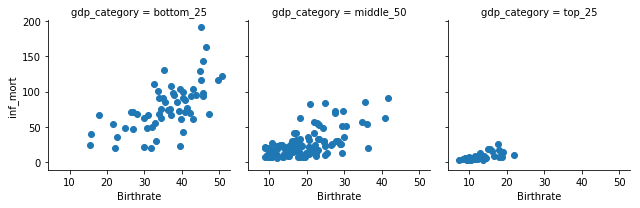

In [53]:
g = sns.FacetGrid(feat, col='gdp_category')
g = (g.map(plt.scatter, 'Birthrate', 'inf_mort'))


# sns.lmplot(x='Birthrate', y='inf_mort', hue='gdp top 25%', data=feat)                 
# sns.lmplot(x='Birthrate', y='inf_mort', hue='gdp bot 25%', data=feat)
# sns.lmplot(x='Birthrate', y='inf_mort', hue='Ag Top 25%', data=feat)

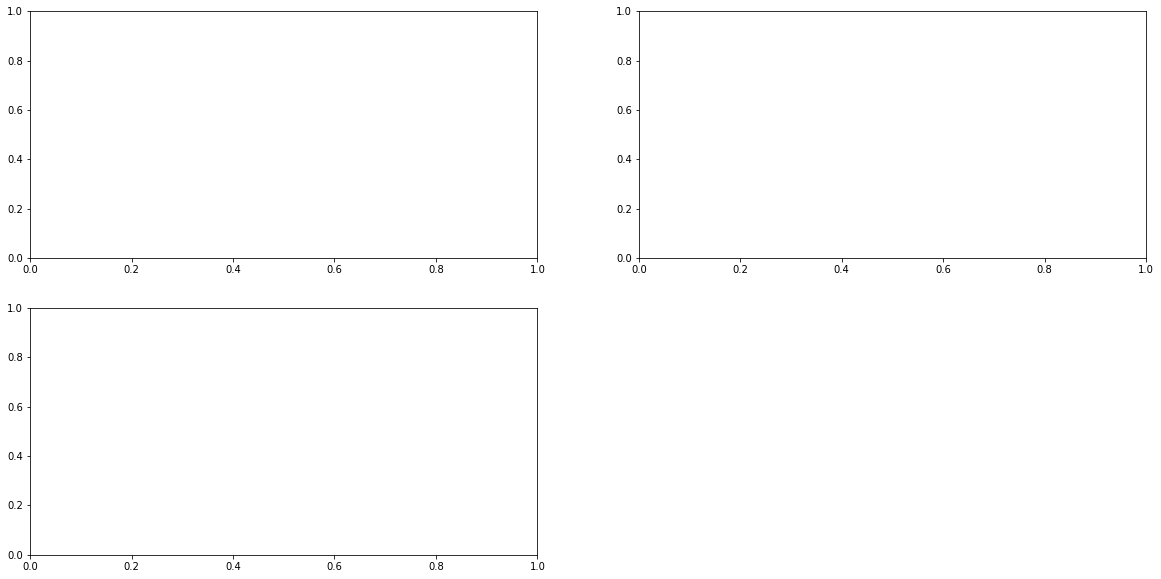

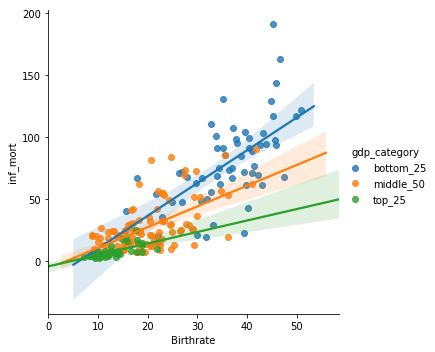

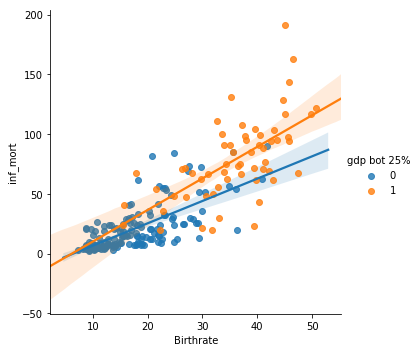

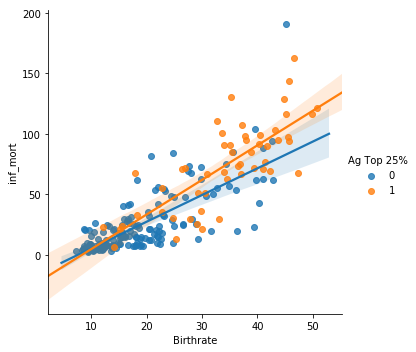

In [57]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.lmplot(x='Birthrate', y='inf_mort', hue='gdp_category', data=feat)

fig.add_subplot(222)
sns.lmplot(x='Birthrate', y='inf_mort', hue='gdp bot 25%', data=feat)

fig.add_subplot(223)
sns.lmplot(x='Birthrate', y='inf_mort', hue='Ag Top 25%', data=feat)
plt.show()

In [56]:
df['GDP ($ per capita)'].groupby(feat['gdp top 25%']).describe()

,count,mean,std,min,25%,50%,75%,max
gdp top 25%,,,,,,,,
0,168.0,4525.595238,3651.396206,500.0,1575.0,3400.0,6700.0,15000.0
1,58.0,24648.275862,7299.200662,15700.0,19000.0,23300.0,28750.0,55100.0


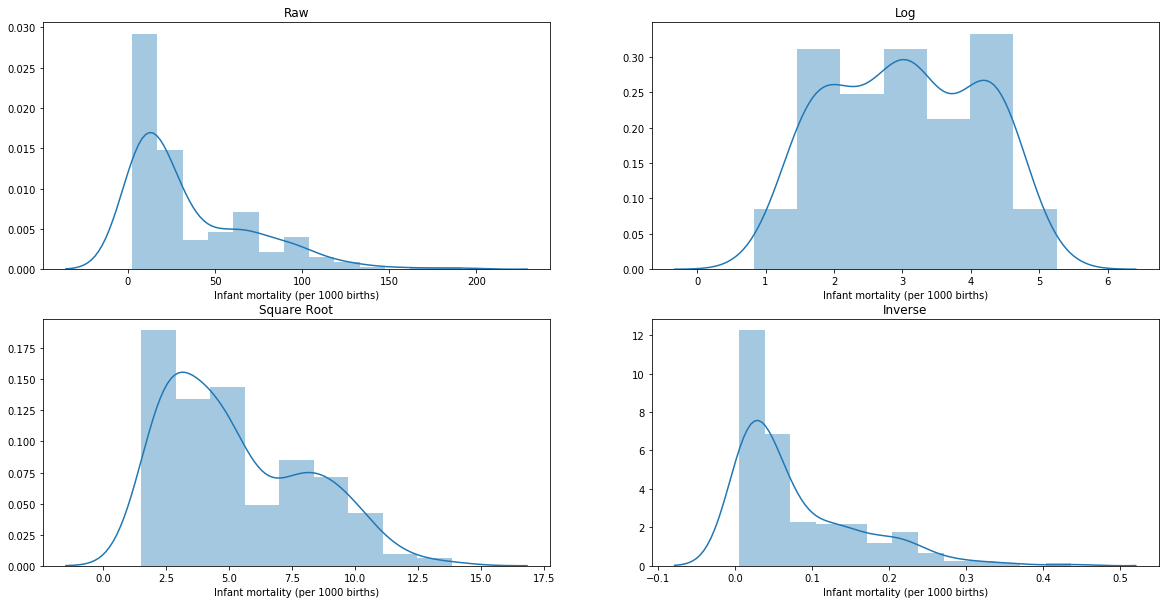

In [37]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.distplot(df_sub['Infant mortality (per 1000 births)'].dropna())
plt.title('Raw')

fig.add_subplot(222)
sns.distplot(np.log(df_sub['Infant mortality (per 1000 births)'].dropna()))
plt.title('Log')

fig.add_subplot(223)
sns.distplot(np.sqrt(df_sub['Infant mortality (per 1000 births)'].dropna()))
plt.title('Square Root')

ax3=fig.add_subplot(224)
sns.distplot(1/df_sub['Infant mortality (per 1000 births)'].dropna())
plt.title('Inverse')
plt.show()

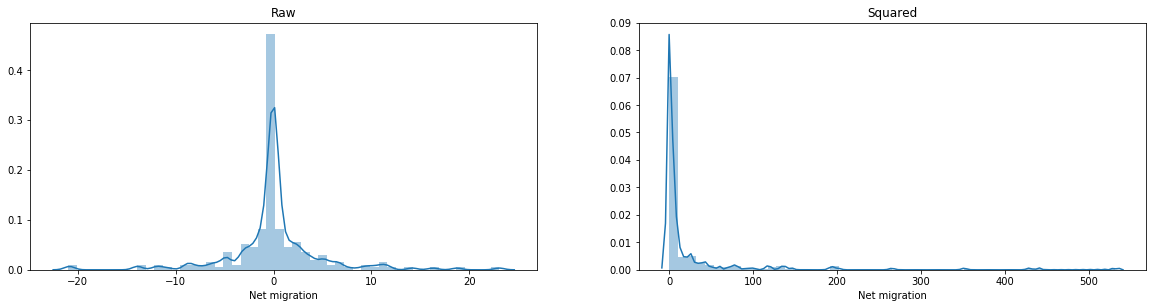

In [83]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.distplot(df_sub['Net migration'].dropna())
plt.title('Raw')

ax3=fig.add_subplot(222)
sns.distplot(df_sub['Net migration'].dropna() * df_sub['Net migration'].dropna())
plt.title('Squared')
plt.show()

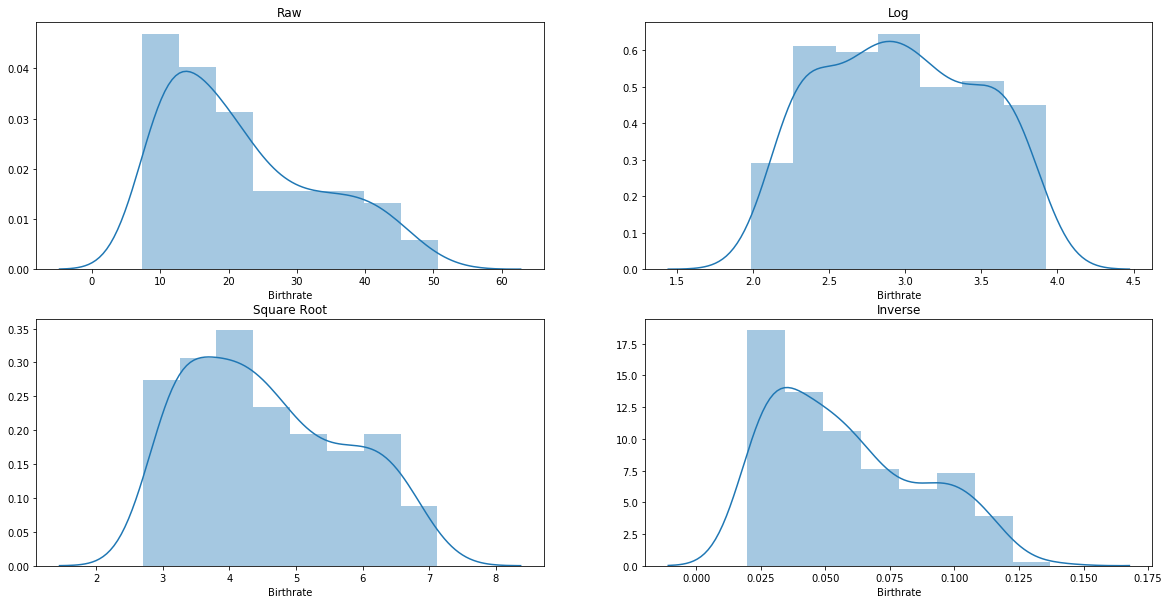

In [84]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.distplot(df_sub['Birthrate'].dropna())
plt.title('Raw')

fig.add_subplot(222)
sns.distplot(np.log(df_sub['Birthrate'].dropna()))
plt.title('Log')

fig.add_subplot(223)
sns.distplot(np.sqrt(df_sub['Birthrate'].dropna()))
plt.title('Square Root')

ax3=fig.add_subplot(224)
sns.distplot(1/df_sub['Birthrate'].dropna())
plt.title('Inverse')
plt.show()